In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
# Lets load and read the file
df=pd.read_csv("Drugs.csv")
df

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
...,...,...,...,...,...,...
3102,3102,vyvanse,10,Highly Effective,adhd,Mild Side Effects
3103,3103,zoloft,1,Ineffective,depression,Extremely Severe Side Effects
3104,3104,climara,2,Marginally Effective,total hysterctomy,Moderate Side Effects
3105,3105,trileptal,8,Considerably Effective,epilepsy,Mild Side Effects


In [ ]:
df.isnull().sum()

Unnamed: 0       0
urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
2488,2488,keflex,2,Ineffective,NaN,No Side Effects


In [ ]:
df=pd.read_csv("Drugs.csv").drop(columns=['Unnamed: 0'])
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [ ]:
df[['urlDrugName','condition']].head(15)

,urlDrugName,condition
0,enalapril,management of congestive heart failure
1,ortho-tri-cyclen,birth prevention
2,ponstel,menstrual cramps
3,prilosec,acid reflux
4,lyrica,fibromyalgia
5,propecia,hair loss
6,vyvanse,add
7,elavil,depression
8,xanax,panic disorder
9,claritin,allergies


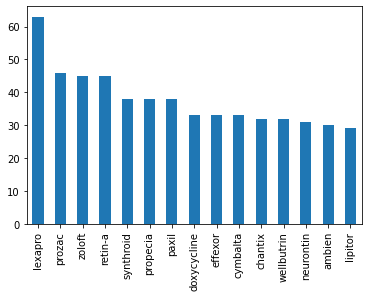

In [ ]:
# Lets check the list of drugs available (top 10)
df['urlDrugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,10)
plt.show()

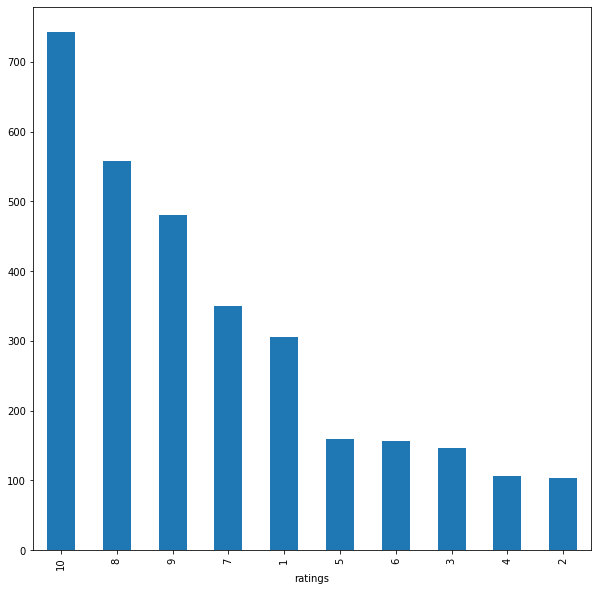

In [ ]:
# Lets check the ratings of the drugs
df['rating'].value_counts().head(15).plot(kind='bar')
plt.xlabel('ratings')
plt.show()

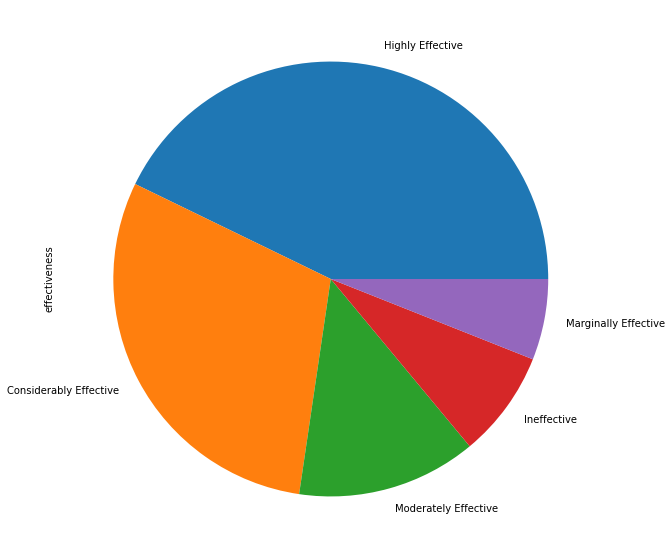

In [ ]:
# Lets check the effectiveness of the drugs
df['effectiveness'].value_counts().plot(kind='pie')
plt.show()


In [ ]:
df['condition'].value_counts()

depression              236
acne                    165
anxiety                  63
insomnia                 54
birth control            49
                       ... 
prostate procedure        1
sleep problems            1
elevated cholesterol      1
anxiety,depression        1
teeth extractions         1
Name: condition, Length: 1426, dtype: int64

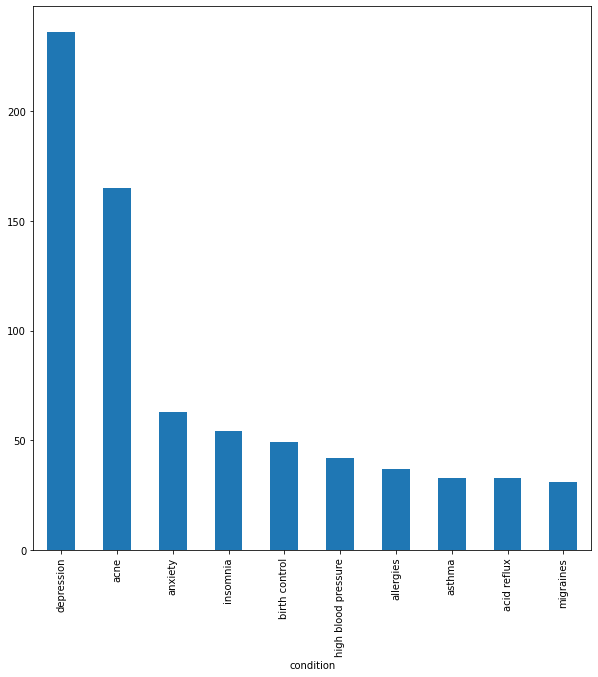

In [ ]:
#lets check the various conditions the medicine cures (top 10) since they are over thousand
df['condition'].value_counts().head(10).plot(kind='bar')
plt.xlabel('condition')
plt.show()

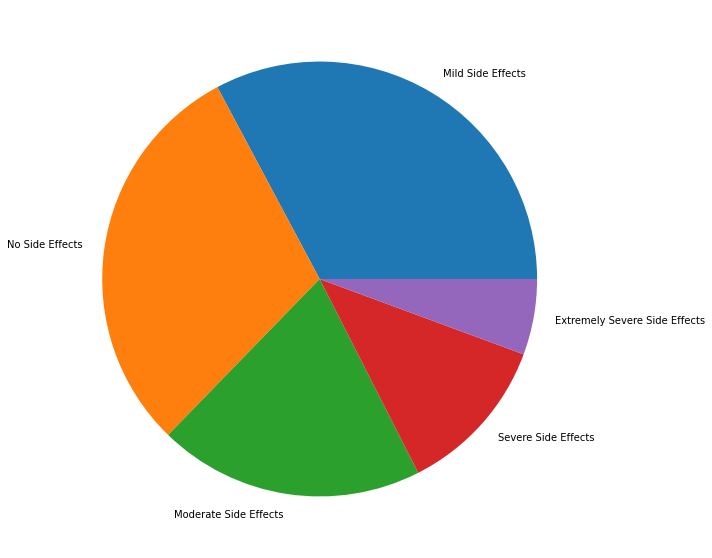

In [ ]:
# Lets check our target variable 'sideEffects'
df['sideEffects'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
#put target into a separate columns
target=df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [ ]:
# Lets convert categorical data to numeric
cols=['urlDrugName','effectiveness','condition']
for x in cols:
  df[x]=pd.factorize(df[x])[0]

target=pd.factorize(target)[0]
df.head()  

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


In [ ]:
# scaling the data before modelling
scaler=StandardScaler()
df=scaler.fit_transform(df)
df

array([[-1.21297976, -1.02349444, -1.04689456, -0.94221638],
       [-1.20449215, -2.04490682, -1.04689456, -0.93987936],
       [-1.19600454,  1.01933033, -1.04689456, -0.93754234],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38803771],
       [ 3.03931298,  0.33838874,  0.85712577, -0.67112201],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74123262]])

In [ ]:
# splitting data into train and validation
x_train,x_test,y_train,y_test=train_test_split(df,target)

In [ ]:
# using SVM
svm_clf=SVC().fit(x_train,y_train)
svm_pred=svm_clf.predict(x_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.47      0.63      0.54       243
           1       0.42      0.44      0.43       100
           2       0.63      0.55      0.59       238
           3       0.36      0.22      0.28        36
           4       0.44      0.33      0.38       160

    accuracy                           0.50       777
   macro avg       0.47      0.43      0.44       777
weighted avg       0.50      0.50      0.49       777



In [ ]:
# using random forest
rf_clf=RandomForestClassifier().fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.44      0.47      0.45       243
           1       0.39      0.37      0.38       100
           2       0.54      0.51      0.52       238
           3       0.37      0.44      0.41        36
           4       0.39      0.37      0.38       160

    accuracy                           0.45       777
   macro avg       0.43      0.43      0.43       777
weighted avg       0.45      0.45      0.45       777

